# Assignment 2

## Question 1

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load the data:
data = pd.read_csv("data.csv")


In [3]:
# Explore the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  object
 1   Addthis        10000 non-null  int64 
 2   Bebo           10000 non-null  int64 
 3   Blogcatalog    10000 non-null  int64 
 4   Blogger        10000 non-null  int64 
 5   Buddymedia     10000 non-null  int64 
 6   Cnet           10000 non-null  int64 
 7   Conduit        10000 non-null  int64 
 8   Customerlobby  10000 non-null  int64 
 9   Delicious      10000 non-null  int64 
 10  Digg           10000 non-null  int64 
 11  Diigo          10000 non-null  object
 12  Docs           10000 non-null  int64 
 13  Docstoc        10000 non-null  int64 
 14  Download       10000 non-null  int64 
 15  Dropbox        10000 non-null  int64 
 16  Drupal         10000 non-null  int64 
 17  Epinions       10000 non-null  int64 
 18  Evernote       10000 non-nu

In [4]:
#Explore column Diigo as data type is object
data['Diigo'].value_counts()


Diigo
0                         8842
Error: value not found     642
1                          332
2                          183
3                            1
Name: count, dtype: int64

In [3]:
#drop Diigo as column has bad data quality, contains "Error: value not found" several timey
data.drop('Diigo', axis=1, inplace=True)

In [5]:
# Check for negative values in releavnt columns:
negative_counts = (data.iloc[:, 1:-1] < 0).sum()
print(negative_counts)


Addthis        0
Bebo           0
Blogcatalog    0
Blogger        0
Buddymedia     0
              ..
Xanga          0
Yelp           0
Yfrog          0
Youtube        0
Yuku           0
Length: 80, dtype: int64


In [6]:
# Filter all values above 1000 views as the indicate outliers (excluding the first column)
# Create mask for filtering
mask = (data.iloc[:, 1:] > 1000).any(axis=1)

# Apply boolean mask to data
data = data.drop(data[mask].index)

In [7]:
# Create X and Y datasets for training
X = data.drop(['Unnamed: 0', 'Click'], axis=1)
Y = data['Click']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print("X - Training Data Shape:", X_train.shape)
print("X - Testing Data Shape:", X_test.shape)

X - Training Data Shape: (7999, 80)
X - Testing Data Shape: (2000, 80)


In [8]:
# Normalize the data for further use in SVM and random forest
scaler = StandardScaler()

# Normalize the training data
X_train_normalized = scaler.fit_transform(X_train)

# Normalize the testing data
X_test_normalized = scaler.transform(X_test)

#Verfiy size of the data:
print("X - Training Data Shape:", X_train_normalized.shape)
print("X - Testing Data Shape:", X_test_normalized.shape)

X - Training Data Shape: (7999, 80)
X - Testing Data Shape: (2000, 80)


### 1.1 Support Vector Machine

accuracy_score: 0.961 

Classifiaction Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1706
           1       0.97      0.76      0.85       294

    accuracy                           0.96      2000
   macro avg       0.96      0.88      0.91      2000
weighted avg       0.96      0.96      0.96      2000

Cross validation train_score 0.969527455461791
Cross validation test_score [0.96       0.97       0.9575     0.965625   0.96060038]

Confusion Matrix



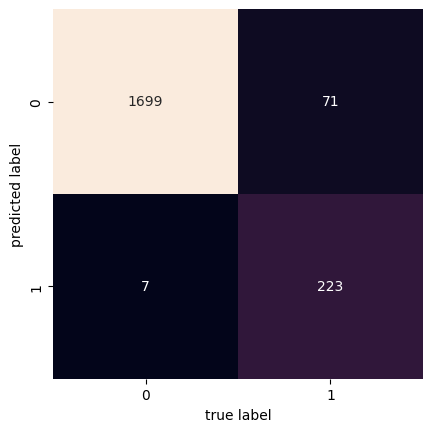

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

svc = SVC(kernel='linear',class_weight='balanced',random_state=42)

svc.fit(X_train_normalized, y_train)
svc_pred = svc.predict(X_test_normalized)

#Accuracy Score
print('accuracy_score:',accuracy_score(svc_pred, y_test),"\n")

#Calssifiaction Report
print("Classifiaction Report:\n",classification_report(svc_pred, y_test))

#Cross Validation
cross_val_score_svc = cross_validate(svc, X_train_normalized, y_train,cv = 5,return_train_score=True)
print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'])

#heatmap confusion matrix
print("\nConfusion Matrix\n")
mat = confusion_matrix(svc_pred,y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 1.1 Random Forest

accuracy_score: 0.8885 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1993
           1       0.03      1.00      0.06         7

    accuracy                           0.89      2000
   macro avg       0.52      0.94      0.50      2000
weighted avg       1.00      0.89      0.94      2000

Cross validation train_score 1.0
Cross validation test_score [0.87625    0.876875   0.875625   0.875625   0.87742339]


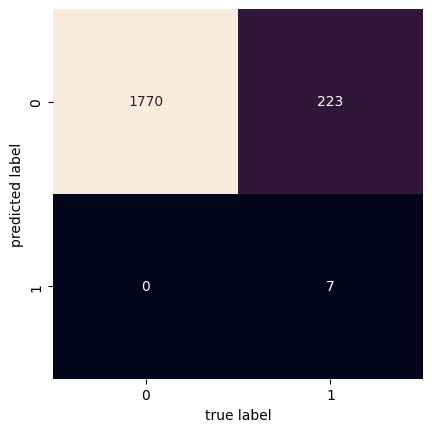

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_normalized, y_train)
ypred = model.predict(X_test_normalized)

#Accuracy Score
print('accuracy_score:',accuracy_score(ypred, y_test),"\n")

#Print classification report for this classifier:
print(metrics.classification_report(ypred, y_test))

#Cross Validation
cross_val_score_svc = cross_validate(model, X_train_normalized, y_train,cv = 5,return_train_score=True)
print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'])


#confusion matrix as heatmap
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


### 1.2 Feature Importance

Text(0.5, 1.0, 'Top 5 Features')

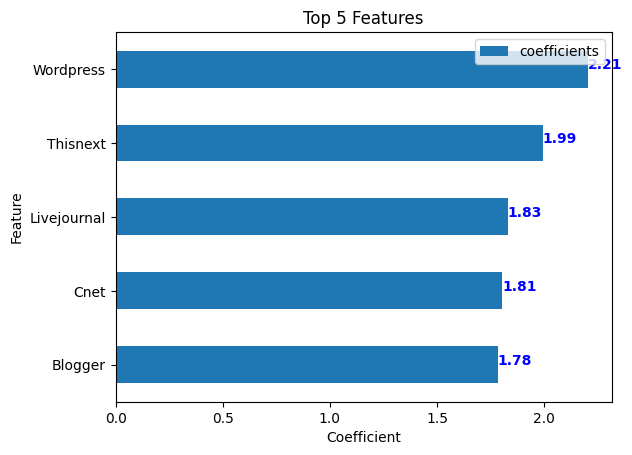

In [12]:
# get top 5 features
top_features = pd.DataFrame(abs(svc.coef_[0]), index=X.columns, columns=["coefficients"]).nlargest(5, "coefficients").sort_values("coefficients", ascending=True)

# Plot the top features
ax = top_features.plot(kind='barh')

# Add coefficient values to the plot
for i, v in enumerate(pd.Series(abs(svc.coef_[0]), index=X.columns).nlargest(5).sort_values(ascending=True)):
    ax.text(v, i, str(round(v, 2)), color='blue', fontweight='bold')

plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')


### 1.3

In [13]:
#costs per channel
#mean not necessary as each channel was used for each ad, thus you would always divide by same number
costs = X*0.1

sum_cost = costs.sum().round(4)
sum_cost = pd.DataFrame(sum_cost)
sum_cost.rename(columns={0: "costs"}, inplace=True)

#join costs with top feature df from 1.2
joined_df = top_features.join(sum_cost)
joined_df

#importance vs cost coefficient
joined_df["Iportance vs Costs"] = joined_df["coefficients"] / joined_df["costs"]
joined_df
joined_df = joined_df.sort_values(by='Iportance vs Costs', ascending=False)
joined_df

#Thisnext and Livejournal are recommendet to used based on importance and costs.


,coefficients,costs,Iportance vs Costs
Thisnext,1.994464,201.9,0.009878
Livejournal,1.831178,1601.5,0.001143
Wordpress,2.205160,2176.9,0.001013
Cnet,1.805513,1950.4,0.000926
Blogger,1.784523,2822.9,0.000632
